## Load the Data

In [2]:
import pandas as pd

In [3]:
pd.read_excel('/Users/gerardmartinez/Desktop/premierleague.xlsx',index_col='Team')
Data_premier = pd.read_excel('/Users/gerardmartinez/Desktop/premierleague.xlsx', index_col='Team')

In [4]:
Data_premier

,Games,wins,Draws,Lost,Points,PES
Team,,,,,,
Manchester City,19,15,2,2,47,93
Liverpool FC,19,13,5,1,44,92
Chelsea FC,19,12,5,2,41,74
Arsenal FC,19,11,2,6,35,71
Tottenham Hotspur,19,11,2,6,35,69
Manchester United,19,10,4,5,34,58
West Ham United,19,9,4,6,31,56
Wolverhampton Wanderers,19,8,4,7,28,52
Crystal Palace,19,5,8,6,23,51


## `LinearRegression()` Model in Python

In [11]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

### Separate the variables

In [12]:
target = Data_premier['Points']
features = Data_premier[['wins','Draws']]

### Fit the Model

In [13]:
model_lr.fit(X=features, y=target)

LinearRegression()

### Predictions

### Calculate predictions

In [14]:
model_lr.predict(X= features)

array([47., 44., 41., 35., 35., 34., 31., 28., 23., 23., 23., 23., 23.,
       20., 20., 19., 16., 14., 11., 10.])

### Add a new column to the dataFrame

In [17]:
Data_premier['pred_lr'] = model_lr.predict(X= features)

In [197]:
Data_premier

,Games,wins,Draws,Lost,Points,PES,pred_lr,pred_rf,pred_sv
Team,,,,,,,,,
Manchester City,19,15,2,2,47,93,47.170068,45.010000,30.419988
Liverpool FC,19,13,5,1,44,92,41.877551,42.160000,32.160731
Chelsea FC,19,12,5,2,41,74,39.231293,39.220000,32.548425
Arsenal FC,19,11,2,6,35,71,36.585034,35.180000,32.333857
Tottenham Hotspur,19,11,2,6,35,69,36.585034,35.180000,32.333857
Manchester United,19,10,4,5,34,58,33.938776,33.290000,31.426610
West Ham United,19,9,4,6,31,56,31.292517,30.330000,29.906226
Wolverhampton Wanderers,19,8,4,7,28,52,28.646259,26.976000,28.006274
Crystal Palace,19,5,8,6,23,51,20.707483,21.766488,22.900000


### Model visualization

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='wins', ylabel='Points'>

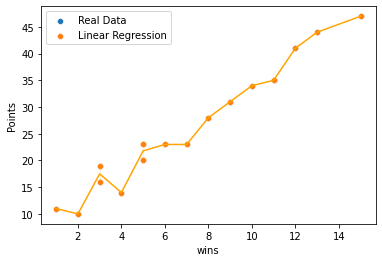

In [20]:
sns.scatterplot(x=Data_premier.wins, y=Data_premier.Points,label='Real Data')
sns.scatterplot(x=Data_premier.wins, y=Data_premier.pred_lr,label='Linear Regression')
sns.lineplot(x=Data_premier.wins, y=Data_premier.pred_lr, color='orange')

## Model Score

In [146]:
model_lr.score(X=features,y=target)

0.9638525822313945

### How to Explain the score

#### The Residuals

In [147]:
Data_premier['Residuals']= Data_premier.Points - Data_premier.pred_lr

In [148]:
Data_premier.Residuals.sum().round(2)

-0.0

In [149]:
Data_premier['Residuals2']= Data_premier.Residuals**2

In [150]:
RSS = Data_premier.Residuals2.sum()

### Target Variation

In [189]:
TSS = ((Data_premier.Points - Data_premier.Points.mean())**2).sum()
TSS

2136.0

### The Ratio (HOW BAD IS MY MODEL)

In [152]:
RSS/TSS

0.036147417768605576

### how good is my model which is the same that we got with the score function

In [153]:
1 - RSS/TSS

0.9638525822313945

In [154]:
df_premier.score(X=features,y=target)

0.9638525822313945

In [31]:
# the model is able to explain 96% of the variability of the points

### Model interpretation

In [155]:
df_premier.coef_

array([2.6462585])

In [156]:
df_premier.intercept_

7.476190476190471

In [157]:
Points = (7.47) + (2.64) * Data_premier.wins

In [158]:
df_to_pred = pd.DataFrame({'wins':[1,2,3,4,5]})
df_to_pred = df_to_pred.fillna(0)
df_to_pred

,wins
0,1
1,2
2,3
3,4
4,5


In [159]:
df_to_pred ['pred'] = 7.47 + 2,64 * df_to_pred.wins

ValueError: Length of values (2) does not match length of index (5)

## RandomForestRegressor() in Python

### Fit the model

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
model_rf = RandomForestRegressor()

In [162]:
model_rf.fit(X=features, y=target)

RandomForestRegressor()

### Calculate the predictions

In [194]:
model_rf.predict(X=features)

array([45.01      , 42.16      , 39.22      , 35.18      , 35.18      ,
       33.29      , 30.33      , 26.976     , 21.7664881 , 22.4260119 ,
       23.54514286, 21.7664881 , 21.7664881 , 21.7664881 , 21.7664881 ,
       16.5865    , 16.5865    , 15.20835714, 11.4925    , 11.1025    ])

In [195]:
Data_premier['pred_rf']=model_rf.predict(X=features)

### Model's Score

In [191]:
model_rf.score(X=features,y=target)

0.984503797616261

## SVR()in Python

In [166]:
from sklearn.svm import SVR

### Fit the model

In [167]:
model_sv = SVR()

In [168]:
model_sv.fit(X=features,y=target)

SVR()

### Caluculate the prediction

In [193]:
Data_premier['pred_sv']=model_sv.predict(X=features)

### Model's score

In [170]:
model_sv.score(X=features,y=target)

0.5627374628321256

## Which one is the best?

In [171]:
model_lr.score(X=features,y=target)

0.9638525822313945

In [90]:
model_rf.score(X=features,y=target)

0.9850429092959944

In [91]:
model_sv.score(X=features,y=target)

0.5627374628321256

### Visualize the 3 models

In [211]:
Data_premier[['Points','PES','pred_lr','pred_rf','pred_sv','PES - Points']]

,Points,PES,pred_lr,pred_rf,pred_sv,PES - Points
Team,,,,,,
Manchester City,47,93,47.170068,45.010000,30.419988,45.93
Liverpool FC,44,92,41.877551,42.160000,32.160731,50.21
Chelsea FC,41,74,39.231293,39.220000,32.548425,34.85
Arsenal FC,35,71,36.585034,35.180000,32.333857,34.49
Tottenham Hotspur,35,69,36.585034,35.180000,32.333857,32.49
Manchester United,34,58,33.938776,33.290000,31.426610,24.13
West Ham United,31,56,31.292517,30.330000,29.906226,24.77
Wolverhampton Wanderers,28,52,28.646259,26.976000,28.006274,23.41
Crystal Palace,23,51,20.707483,21.766488,22.900000,30.33


In [210]:
Data_premier['PES - Points']=Data_premier.PES - Points

<AxesSubplot:xlabel='wins', ylabel='Points'>

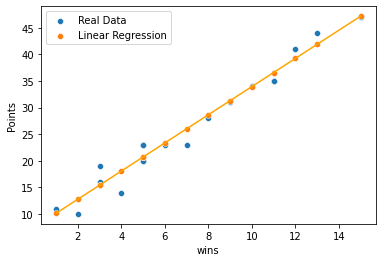

In [145]:
sns.scatterplot(x=Data_premier.wins, y=Data_premier.Points,label='Real Data')
sns.scatterplot(x=Data_premier.wins, y=Data_premier.pred_lr,label='Linear Regression')
sns.lineplot(x=Data_premier.wins, y=Data_premier.pred_lr, color='orange')